In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

tf.Datasets will take images as input, in **batches**

# Loading the dataset

**image_dataset_from_directory**: loads all images into the tf dataset

In [2]:
IMAGE_SIZE = 256 #check image size in the image's properties
BATCH_SIZE = 32 # 32 is standard batch size
CHANNELS = 3 # R,G,B channels"
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato disease',
    shuffle=True, #shuffles images and loads them
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Since we gave the **batch size as 32, we have 68 elements/ batches** in the dataset, where **each element is a batch of 32 images**

In [5]:
len(dataset)

68

**image_batch:**

images - 32 <br>
image size - 256x256 <br>
channels - 3 (R,G,B) <br>

**label_batch:**
Potato___Early_blight - 0, Potato___Late_blight - 1, Potato_healthy - 2

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) # Every element is a tensor, so we need to convert to numpy

(32, 256, 256, 3)
[1 1 0 0 0 1 2 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 2 0 0 1 1 1 2 2 0 1]


### Printing the first image: image is a tensor. (i.e tf.Tensor)

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])


tf.Tensor(
[[[143. 137. 139.]
  [140. 134. 136.]
  [138. 132. 134.]
  ...
  [163. 157. 159.]
  [162. 156. 158.]
  [160. 154. 156.]]

 [[141. 135. 137.]
  [142. 136. 138.]
  [144. 138. 140.]
  ...
  [164. 158. 160.]
  [164. 158. 160.]
  [163. 157. 159.]]

 [[137. 131. 133.]
  [141. 135. 137.]
  [146. 140. 142.]
  ...
  [164. 158. 160.]
  [166. 160. 162.]
  [167. 161. 163.]]

 ...

 [[132. 122. 121.]
  [147. 137. 136.]
  [137. 127. 126.]
  ...
  [137. 128. 131.]
  [155. 146. 149.]
  [150. 141. 144.]]

 [[133. 123. 122.]
  [144. 134. 133.]
  [127. 117. 116.]
  ...
  [130. 121. 124.]
  [139. 130. 133.]
  [144. 135. 138.]]

 [[117. 107. 106.]
  [129. 119. 118.]
  [124. 114. 113.]
  ...
  [127. 118. 121.]
  [141. 132. 135.]
  [156. 147. 150.]]], shape=(256, 256, 3), dtype=float32)


### Converting tensor to numpy: All numbers are between 0 and 255, representing colors

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[161. 155. 157.]
  [163. 157. 159.]
  [166. 160. 162.]
  ...
  [145. 135. 133.]
  [130. 120. 118.]
  [141. 131. 129.]]

 [[151. 145. 147.]
  [154. 148. 150.]
  [142. 136. 138.]
  ...
  [134. 124. 122.]
  [133. 123. 121.]
  [128. 118. 116.]]

 [[145. 139. 141.]
  [149. 143. 145.]
  [172. 166. 168.]
  ...
  [137. 127. 125.]
  [148. 138. 136.]
  [130. 120. 118.]]

 ...

 [[160. 155. 159.]
  [160. 155. 159.]
  [163. 158. 162.]
  ...
  [143. 137. 139.]
  [143. 137. 139.]
  [146. 140. 142.]]

 [[159. 154. 158.]
  [159. 154. 158.]
  [165. 160. 164.]
  ...
  [152. 146. 148.]
  [151. 145. 147.]
  [152. 146. 148.]]

 [[159. 154. 158.]
  [159. 154. 158.]
  [166. 161. 165.]
  ...
  [155. 149. 151.]
  [155. 149. 151.]
  [154. 148. 150.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


<br>

# Visualising the image

**imshow()** expects a **3D array**, since it was float, we **convert into int**

Every time the below cell is run, we get **different images,since shuffle is true**

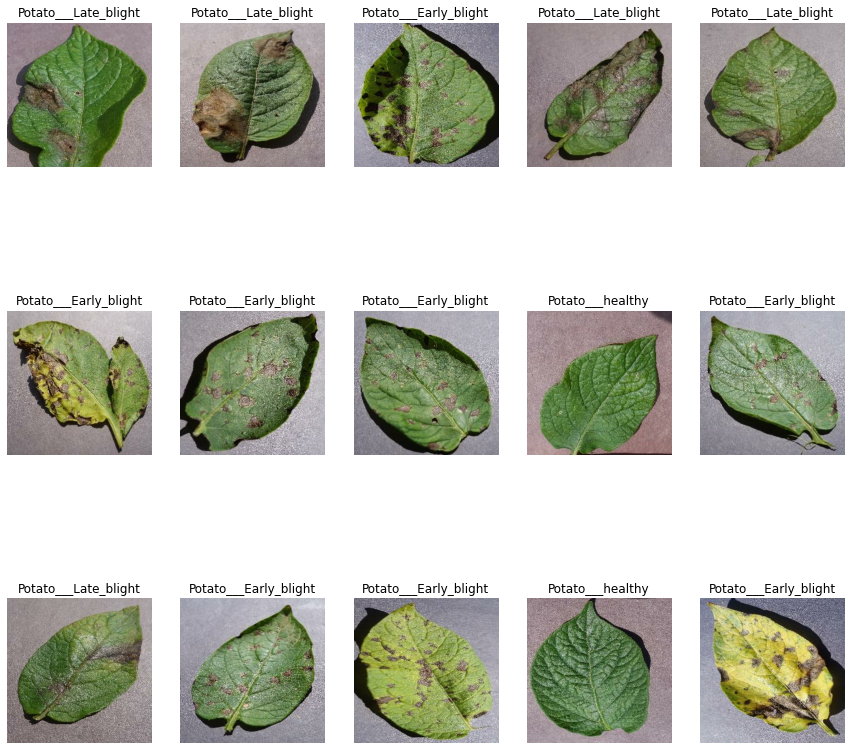

In [10]:
#increase the dimension of images to be displayed on plt.
plt.figure(figsize=(15,15))

for image_batch, label_batch in dataset.take(1):
    #displaying 15 images from the first batch of 32 images
    for i in range(15):
        #to show the 15 images as a matrix
        ax = plt.subplot(3,5, i+1)
        
        plt.imshow(image_batch[i].numpy().astype('uint8')) 

        # Displaying the label of first image in the class
        plt.title(class_names[label_batch[i]]) 

        # to hide the axis numbers
        plt.axis('off') 
    

# Splitting the data set into training and testing set: 

## 80% as training, 20% as testing <br>
Validation set is used during training. We validate after **each epoch**
## 20% test - 10% as validation, 10% test


In [11]:
train_size = 0.8 #80%

#len(dataset) = 68.
len(dataset) * train_size 

54.400000000000006

We have **54 * 32 images for training**

In [12]:
#taking first 54 batches.
train_ds = dataset.take(54)
len(train_ds)

54

Skipping first 54 batches, taking the **rest for test**

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

Taking **6 batches for validation and 8 for test**

In [14]:
val_size = 0.1 #10%
len(dataset) * val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

Writing a **python function for above steps**

In [17]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    # 80% of the dataset for training, converting to int because prev, we got float
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    
    #10% of the dataset for validation
    val_size = int(val_split * ds_size)
    val_ds = ds.skip(train_size).take(val_size)

    #Skip train_size = 80% and val_size=10%. Take 10% for test
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

### Cache() reads image and stores the image, for next iteration
### Improves pipeline performance
### If CPU/ GPU is busy training, prefetch() loads next set of batch frm disk


In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Data Augmentation: to make the model robust
### if image is rotated, or zoomed in, color contrast, performance will be affected

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Building the MODEL:

**kernel_size:** 3 x 3<br>
**filters:** <br>
Consider an image of Koala:<br> 
one filter to detect eyes, another to detect ears, etc

#### CONVOLUTIONAL AND PULLING LAYERS ----> TRIAL AND ERROR

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    #32 layers = trial and error
    #layers.Conv2D(filters, kernel_size, activation, input_shape)
    layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Whatever is there in last pooling layer, needs to be FLATTENED 
    #so that its an ARRAY OF NEURONS
    layers.Flatten(),
    
    #After flattening, we can have a HIDDEN DENSE LAYER
    
    #First dense layer has 64 neurons
    layers.Dense(64, activation = 'relu'),
    #Second dense layer has 3 neurons.
    #softmax normalises probability of the classes
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

NotImplementedError: Cannot convert a symbolic Tensor (sequential_1/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

**Trainable params are the weights**

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1, #to print many outputs to check whats going on
    validation_data = val_ds
)

### Model should be tested on test data before deploying

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores ##1st param: loss, 2nd param: accuracy

# Plot training history on graph

In [ ]:
history

### Above cell says model is keras callback history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

## Plotting the loss vs accuracy for validation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

## Plotting the training vs validation - accuracy and loss graphs

In [ ]:
# Accuracy

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Making predictions/inferences on sample images

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

Representing above **image as a 3D array**

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    
    print("Actual label: ", class_names[first_label])
    
    #Prediction for 32 images
    batch_prediction = model.predict(images_batch)
    
    #Prediction for 1st image
    print('Predicted Label: ',class_names[np.argmax(batch_prediction[0])])
        

We see a **3D array of PROBABILITY VALUES** because in **DENSE LAYER**,
we mentioned **n_classes = 3, activation as 'softmax'**. <br>
One of those 3 probability values is the highest i.e <br>
**IMAGE BELONGS TO THE CLASS WITH HIGHEST PROB. VALUE**

In [ ]:
np.argmax([9.9821883e-01,1.7806785e-03, 4.8869288e-07])

In [ ]:
def predict(model, img):
    #Converting image into image array
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    
    # Create a batch
    img_array = tf.expand_dims(img_array, 0) 
    
    #Calling prediction function
    predictions = model.predict(img_array)
    
    #Find predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence #gives the prediction class and confidence about the prediction

In [ ]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        #Calling the predicted_class and confidence using the model and images
        predicted_class, confidence = predict(model, images[i].numpy())
        
        #Actual class
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}')
        
        plt.axis('off')

In [ ]:
# SKIP THIS CELL AND RUN THE NEXT 2 CELLS
model_version = 1
model.save(f'../saved_models/{model_version}')

In [ ]:
import os
os.listdir('../saved_models') #Returns a string

In [ ]:
 # +1 gives nxt version to be saved
model_version = max([int(i) for i in os.listdir('../saved_models')]) + 1
model.save(f'../saved_models/{model_version}')